#Liquor Sales in Iowa, USA, spanning the years 2012-2020

## Tasks

Discern the most popular item in each zipcode and

Compute the sales percentage per store (in dollars).

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('https://storage.googleapis.com/courses_data/Assignment%20CSV/finance_liquor_sales.csv')
print(df.describe())
df.head()

       store_number      zip_code  county_number      category  vendor_number  \
count     200.00000    200.000000     199.000000  1.970000e+02      200.00000   
mean     3658.46500  51367.520000      55.351759  1.167075e+06      279.87500   
std      1207.00655    945.237701      27.128331  2.482830e+05      152.99154   
min      2178.00000  50009.000000       3.000000  1.011300e+06       35.00000   
25%      2593.00000  50401.000000      32.000000  1.051110e+06      107.50000   
50%      3509.00000  51301.000000      57.000000  1.081330e+06      303.00000   
75%      4358.75000  52314.000000      77.000000  1.091200e+06      421.00000   
max      9001.00000  52807.000000      97.000000  1.901200e+06      662.00000   

         item_number        pack  bottle_volume_ml  state_bottle_cost  \
count     200.000000  200.000000        200.000000         200.000000   
mean    99695.930000   11.560000        841.975000          10.041200   
std    195813.621412    6.895953        441.554727 

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-31797900035,2020-11-10,4967,Jeff's Market / Blue Grass,"102, W Mayne St",Blue Grass,52726.0,POINT (-90.766126 41.509119),82.0,SCOTT,...,26858,Templeton 4YR Rye,12,375,9.99,14.99,1,14.99,0.37,0.09
1,INV-23548800092,2019-11-27,2601,Hy-Vee Food Store / Fairfield,1300 West Burlington Ave,Fairfield,52556.0,POINT (-91.978702 41.006456),51.0,JEFFERSON,...,86251,Juarez Triple Sec,12,1000,2.42,3.63,6,21.78,6.00,1.58
2,INV-23609300026,2019-12-02,4962,Hilltop Grocery,1312 Harrison St,Davenport,52803.0,NaN,82.0,SCOTT,...,41844,Everclear Alcohol,24,375,4.20,6.30,3,18.90,1.12,0.29
3,INV-39482900037,2021-08-24,3719,Wal-Mart 0581 / Marshalltown,2802 S Center St,Marshalltown,50158.0,POINT (-92.91231 42.012918),64.0,MARSHALL,...,65259,Jagermeister Liqueur Mini Meisters,12,20,4.93,7.40,12,88.80,0.24,0.06
4,INV-39520400088,2021-08-25,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201.0,POINT (-95.854899 43.184242),71.0,OBRIEN,...,77487,Tortilla Gold DSS,12,1000,4.85,7.28,4,29.12,4.00,1.05


In [6]:
# Convert dates
df['date'] = pd.to_datetime(df['date'])

# Filter for 2016–2019
df_filtered = df[(df['date'].dt.year >= 2016) & (df['date'].dt.year <= 2019)]

# Check for missing values
df_filtered.isnull().sum()

,0
invoice_and_item_number,0
date,0
store_number,0
store_name,0
address,0
city,0
zip_code,0
store_location,9
county_number,1
county,1


In [8]:
# Drop rows with missing critical values
df_filtered = df_filtered.dropna(subset=['zip_code', 'item_description', 'store_name', 'sale_dollars'])

# Standardize ZIP codes to 5-digit strings
df_filtered['zip_code'] = df_filtered['zip_code'].astype(str).str.zfill(5)

In [9]:
# Group by Zip Code and Item
popular_items = (
    df_filtered.groupby(['zip_code', 'item_description'])['sale_dollars']
    .sum()
    .reset_index()
)

# Find item with max sales per ZIP
most_popular_items = (
    popular_items.loc[popular_items.groupby('zip_code')['sale_dollars'].idxmax()]
    .sort_values(by='zip_code')
)

In [10]:
# Total sales per store
store_sales = df_filtered.groupby('store_name')['sale_dollars'].sum().reset_index()

# Total sales overall
total_sales = store_sales['sale_dollars'].sum()

# Add percentage
store_sales['Sales %'] = (store_sales['sale_dollars'] / total_sales * 100).round(2)

<ipython-input-11-335268b3f2e6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales %', y='store_name', data=top_stores, palette='viridis')


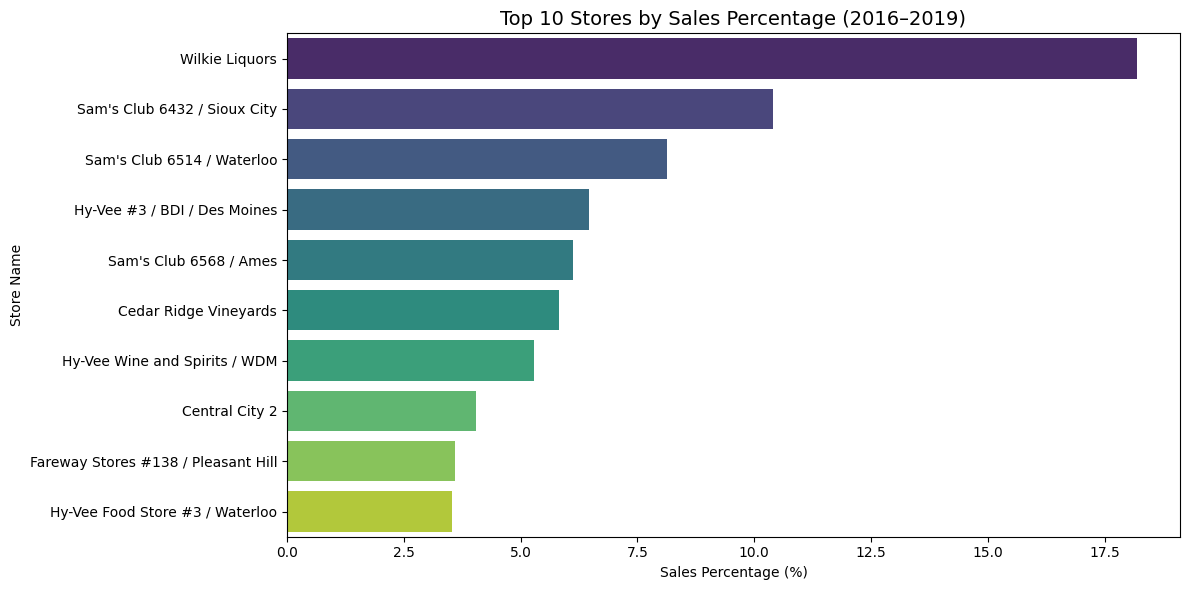

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 stores by percentage
top_stores = store_sales.sort_values('Sales %', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales %', y='store_name', data=top_stores, palette='viridis')
plt.title('Top 10 Stores by Sales Percentage (2016–2019)', fontsize=14)
plt.xlabel('Sales Percentage (%)')
plt.ylabel('Store Name')
plt.tight_layout()
plt.show()

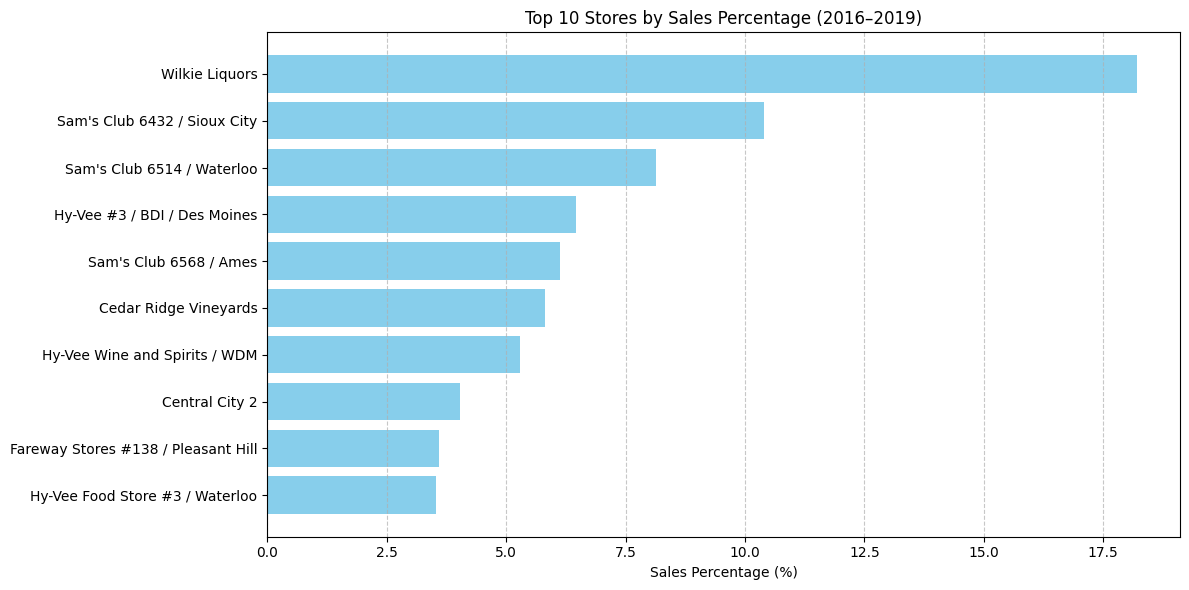

In [13]:
import matplotlib.pyplot as plt

# Data already created earlier: top_stores
plt.figure(figsize=(12, 6))
plt.barh(top_stores['store_name'], top_stores['Sales %'], color='skyblue')
plt.xlabel('Sales Percentage (%)')
plt.title('Top 10 Stores by Sales Percentage (2016–2019)')
plt.gca().invert_yaxis()  # highest % at top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
import plotly.express as px

fig = px.bar(
    top_stores.sort_values('Sales %'),
    x='Sales %',
    y='store_name',
    orientation='h',
    title='Top 10 Stores by Sales Percentage (2016–2019)',
    color='Sales %',
    color_continuous_scale='Viridis',
    labels={'Sales %': 'Sales Percentage (%)', 'Store Name': 'Store'}
)

fig.update_layout(yaxis=dict(categoryorder='total ascending'))
fig.show()

# SOLUTIONS

In [4]:
df["date"] = pd.to_datetime(df["date"])
filtered_df = df[(df["date"].dt.year >= 2016) & (df["date"].dt.year <= 2019)].reset_index()

In [7]:
filtered_df.info()

df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    78 non-null     int64         
 1   invoice_and_item_number  78 non-null     object        
 2   date                     78 non-null     datetime64[ns]
 3   store_number             78 non-null     int64         
 4   store_name               78 non-null     object        
 5   address                  78 non-null     object        
 6   city                     78 non-null     object        
 7   zip_code                 78 non-null     float64       
 8   store_location           69 non-null     object        
 9   county_number            77 non-null     float64       
 10  county                   77 non-null     object        
 11  category                 75 non-null     float64       
 12  category_name            69 non-null  

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-31797900035,2020-11-10,4967,Jeff's Market / Blue Grass,"102, W Mayne St",Blue Grass,52726.0,POINT (-90.766126 41.509119),82.0,SCOTT,...,26858,Templeton 4YR Rye,12,375,9.99,14.99,1,14.99,0.37,0.09
1,INV-23548800092,2019-11-27,2601,Hy-Vee Food Store / Fairfield,1300 West Burlington Ave,Fairfield,52556.0,POINT (-91.978702 41.006456),51.0,JEFFERSON,...,86251,Juarez Triple Sec,12,1000,2.42,3.63,6,21.78,6.00,1.58
2,INV-23609300026,2019-12-02,4962,Hilltop Grocery,1312 Harrison St,Davenport,52803.0,NaN,82.0,SCOTT,...,41844,Everclear Alcohol,24,375,4.20,6.30,3,18.90,1.12,0.29
3,INV-39482900037,2021-08-24,3719,Wal-Mart 0581 / Marshalltown,2802 S Center St,Marshalltown,50158.0,POINT (-92.91231 42.012918),64.0,MARSHALL,...,65259,Jagermeister Liqueur Mini Meisters,12,20,4.93,7.40,12,88.80,0.24,0.06
4,INV-39520400088,2021-08-25,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201.0,POINT (-95.854899 43.184242),71.0,OBRIEN,...,77487,Tortilla Gold DSS,12,1000,4.85,7.28,4,29.12,4.00,1.05


In [8]:
bottles_sold = filtered_df.groupby(["zip_code", "item_number"])["bottles_sold"].sum().reset_index()

In [9]:
bottles_sold["zip_code"] = bottles_sold["zip_code"].astype(int)

In [15]:
idx = bottles_sold.groupby("zip_code")["bottles_sold"].idxmax()
max_bottles = bottles_sold.loc[idx].reset_index()
max_bottles

,index,zip_code,item_number,bottles_sold
0,0,50010,946574,288
1,1,50022,86507,4
2,2,50111,77805,108
3,3,50131,38089,48
4,4,50158,48099,24
5,7,50263,3135,84
6,8,50265,67526,72
7,9,50266,250,90
8,13,50314,86251,240
9,15,50316,48099,48


In [16]:
sorted_values = max_bottles.sort_values(by="bottles_sold", ascending=False).head(20)
sorted_values

,index,zip_code,item_number,bottles_sold
37,62,52314,75087,1560
19,30,50702,77487,768
0,0,50010,946574,288
8,13,50314,86251,240
23,39,51106,67527,240
39,65,52402,86390,216
20,33,50703,168,180
11,19,50320,973627,120
15,24,50501,38176,108
2,2,50111,77805,108


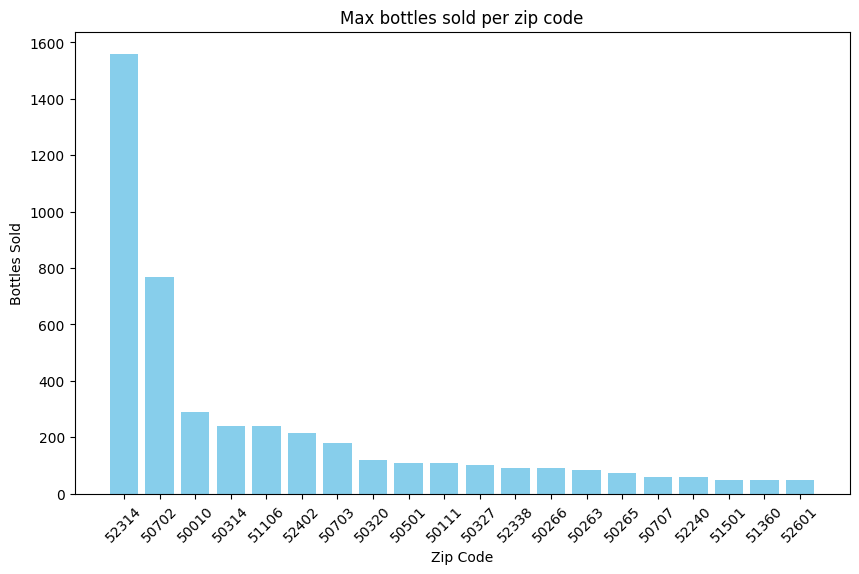

In [14]:
plt.figure(figsize=(10,6))
plt.bar(sorted_values["zip_code"].astype(str), sorted_values["bottles_sold"], color="skyblue")
plt.xlabel("Zip Code")
plt.ylabel("Bottles Sold")
plt.title("Max bottles sold per zip code")
plt.xticks(rotation=45)
plt.show()

In [18]:
total_sales = sum(filtered_df["sale_dollars"])
total_sales

63838.26

In [19]:
sales = filtered_df.groupby("store_name")["sale_dollars"].sum()
sales

,sale_dollars
store_name,
Bootleggin' Barzini's Fin,6.75
Burlington Shell,206.64
CVS Pharmacy #8526 / Cedar Rapids,42.00
Cedar Ridge Vineyards,3712.50
Central City 2,2580.60
...,...
Speedy Gas N Shop,68.18
Tequila's Liquor Store,413.28
The Ox & Wren Spirits and Gifts,75.12


In [20]:
percentage_sales = (sales * 100 / total_sales).round(2)
percentage_sales

,sale_dollars
store_name,
Bootleggin' Barzini's Fin,0.01
Burlington Shell,0.32
CVS Pharmacy #8526 / Cedar Rapids,0.07
Cedar Ridge Vineyards,5.82
Central City 2,4.04
...,...
Speedy Gas N Shop,0.11
Tequila's Liquor Store,0.65
The Ox & Wren Spirits and Gifts,0.12


In [21]:
percentage_sorted_sales = percentage_sales.sort_values(ascending=True).tail(15)
percentage_sorted_sales

,sale_dollars
store_name,
Fareway Stores #067 / Evansdale,2.11
Fareway Stores #153 / W Des Moines,2.11
Hy-Vee / Waukee,2.38
Hy-Vee Food Store / Fort Dodge,2.45
Hy-Vee Food Store #2 / Waterloo,3.12
Hy-Vee Food Store #3 / Waterloo,3.53
Fareway Stores #138 / Pleasant Hill,3.60
Central City 2,4.04
Hy-Vee Wine and Spirits / WDM,5.28


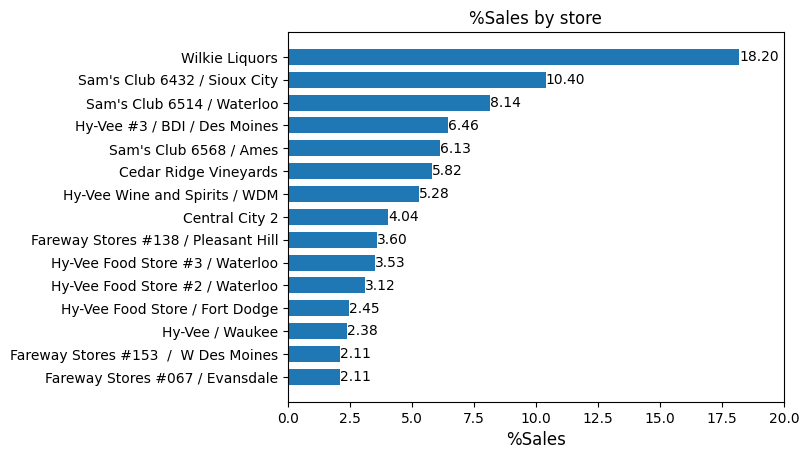

In [22]:
p = plt.barh(percentage_sorted_sales.index, percentage_sorted_sales.values, height=0.7)
plt.title("%Sales by store")
plt.xlabel("%Sales", fontsize=12)
plt.bar_label(p, fmt="%.2f")
plt.xlim([0,20])
plt.show()